# A/B Testing and Power Analysis

[Motivation](#Motivation)

[Experimental Design](#Experimental Design)

[Hypothesis Testing](#Hypothesis Testing)

[Business Acumen](#Business Acumen)

[Power Analysis](#Power Analysis)

[Final Thoughts](#Final Thoughts)



## Motivation

<a id='Motivation'></a>

A/B testing is an experimental method used to <strong>measure the effect of a variable on a target response</strong>. For example, many tech companies use this method to test the effect of product features on an outcome such as clicks, visits, or other metrics that indicate business success. As a data scientist, the outcome of your <i>A/B tests may help your clients make data-driven business decisions.</i> 

## Experimental Design

<a id='Experimental Design'></a>

Typically, you'll be testing whether the difference you observe between two conditions is significant enough to make a decision/enact a feature on that action. Here are a few questions you should answer before performing an A/B test:

1. Do I have the data to answer this question? What kind of data is it and how reproducible is it? Continuous or categorical?

a) Check all available data. Narrow down to relevant dependent variables, and your dependent variable/metric. 

b) Continuous: How is your dependent variable distributed? What's your range of values? Do they make sense? Categorical: Is it balanced? Will you have to use proportions?

2. How will I test my hypothesis?

a) Continuous: If normally distributed: paired (before and after) or unpaired (one condition vs 2nd condition) t-tests. If NOT normally distributed, t-tests may still work, but you'll likely need very large datasets. A better option could be to use equivalent tests that don't assume normality, and compare the medians instead of means. Be cautious about performing t-test on log-transformed data: means you're comparing may no longer reflect differences in means of original data!

3. How much data will be necessary to answer my question? This is called  <strong>Power Analysis</strong>.  
a) Statistical Power refers to the probability that you'll accurately detect True Positives while avoiding False Positives of significant differences. http://meera.snre.umich.edu/power-analysis-statistical-significance-effect-size It makes sense that with more data you'll be able to differentiate appropriately, but how much is enough? It is recommended that you have a power of 0.8 or above. 
Power (sensitivity) has an inverse trade off with size. 
b) Applying it: Tools to calculate it - baseline conversion rate, practical significance level (absolute or relative)

p-values: http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/ 

Effect Size - A metric that allows you to compare the results of significance of multiple tests on the same scale. (meanGroup1-meanGroup2/stdev(eitherGroup)) . 0.3-0.5 are considered moderate, and anything above is considered large difference effect. 

Since you can't calculate this until after experiment, for calculating power, it is suggested you use 0.5.

## Hypothesis Testing

<a id='Hypothesis Testing'></a>

Now that we have our data, we need to test it. 

Calculating the confidence intervals. If we know the means and stdev for our two samples, we can calculate where the boundaries for 95% of the true mean are by using our z-score table. First, look for 0.95 in the table, then find the tenths and then hundredths digits to get the z-score. This z-score essentially tells you how many standard deviations away the 95% boundary is. If we're outside that, then we can say the boundaries for the difference between the means of our two samples, then we can say that with ___% confidence, I can define where the 95% of the true sample mean is 

See khan academy explanation: https://www.youtube.com/watch?v=yQsCMnz9wO8

## Business Acumen
<a id='Business Acumen'></a>

Define question, and a hypothesis: eg. changing the color of my button on a page will increase user engagement.

Define metric: eg. how do you measure 'user engagement'? Keep it practical (eg. clicks instead of certification). Rates or probability are common examples. Rates used to measure usability of site, probability used to measure total impact.

<strong>Business Acumen</strong>
*Understand your product (sensitive to seasonality?)
*Understand your users
*Understand results
**Power analysis 
**Implications of results
**

Binomial - two possible outcomes

Final Observations
*Understand the quality of data that you're collecting (shitty data gives shitty results). 
*Record the conditions of your experiments thoroughly (eg. metadata). Chances are you'll have to repeat the experiment, but proper design of your experiment will save time from having to repeat it again later. 
*Stay focused on answering question at hand.
*When testing the outcomes of a result, preferably run the experiment simultaneously if possible. Time variations 

What can it be used for and what will it not cover. 'Features, changes to UI, speed of response from company'. Isn't good at testing out new experiences, don't want confounding variables (eg. new effect). 

Requirements: Need to randomly sample users. Need to be practical (eg. time, resources).

Target: Consistent responses from groups, see if there's a significant behavior change. For tech A/B testing we have larger groups, but we don't know specifics about users in experiment. Want repeatable results. 

Things to watch out for: confounding effects (seasonality), biases (non-randomized sampling), testing for wrong question.

Statistical vs Substantive Significance

How much of a difference is it worth it to act based on that. Repeatability is key. 

## Final Thoughts

<a id='Final Thoughts'></a>

*Many companies use software that make it easier to run these experiments

*They have indicators about when to finish experiment (once your p-value has surpassed threshold), but they may not be correct (do it right!): http://blog.sumall.com/journal/optimizely-got-me-fired.html

*Novelty effect: You'll get changes in response after you make change just case you made it, good to wait until it stabilizes and to characterize how long this is for future experiments.

*Don't be afraid to run an experiment more than twice, there's a good chance you'll have to even if you've standardized your conditions.

## Power Analysis

<a id='Power Analysis'></a>

Power analysis is a method in experimental design used to calculate the sample size needed to detect an effect at a certain confidence level. When comparing the <strong>difference of means</strong> for a control and an experimental group in an A/B test, we calculate the sample size as follows:

\begin{align}
\ n = \frac{2*sigma^2*(beta + alpha)^2}{effect^2} \\
\end{align}

Where n is the sample size, sigma is the standard deviation, beta is the power (1-type II error or prob. of finding an effect that is there), alpha is the type I error, and effect is the difference in means of the two groups you expect to see in your measurement.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

population= np.random.randn(10000, 1)
population

array([[-0.84242827],
       [ 0.25787374],
       [ 0.5650491 ],
       ..., 
       [-0.65663424],
       [-0.36523653],
       [-1.52644613]])

hist


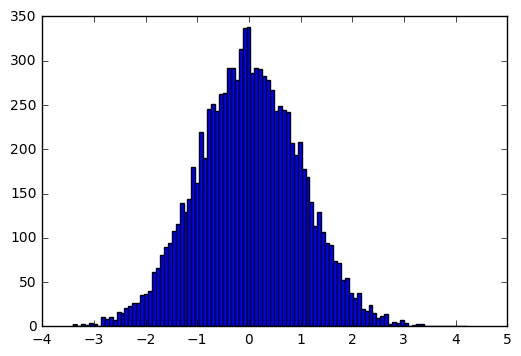

In [22]:
%matplotlib inline 
plt.hist(population, bins=100)
print 'hist'

In [3]:
import scipy.stats

Z95 = scipy.stats.norm.ppf(1 - .05)

In [4]:
Z95

1.6448536269514722